<div class="alert alert-block alert-info">
    <h1 align="center">Time Series Cross Validation & Grid Search</h1>
    <h3 align="center"> Machine Learning Course</h3>
    <h5 align="center">Mohammad Talaei (https://www.linkedin.com/in/mohammad-talaei-mt/)</h5>
</div>

#### Load Dependencies

In [12]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split

#### Set Configuration

In [2]:
plt.style.use('seaborn')

#### Set Hyperparameters

In [6]:
PATH_DATA = "./data/"

#### Load Data

In [7]:
house = pd.read_csv(PATH_DATA + "boston_house_prices.csv", header=1)
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
x = house.drop(house.MEDV.name, axis=1)
y = house.MEDV

#### Creating time series folds

The conventional form of cross validation (KFold) is shown below

<img src="../img/Kfold.png"/>

But when it comes to time series, the test set should always be more recent than train set
So there are two methods for creating time series folds:

##### Time series split

<img src="../img/TS.png"/>

In [9]:
def TS_crossval(X,y,k = 5, test_percent = 0.2):
    wsize = int(X.shape[0]//k)
    test_part = int(test_percent * wsize)
    train_lb = 0
#     train_ub = train_lb + wsize
    X_train={}; y_train={}
    X_test={}; y_test={}
    
    fig = plt.figure(figsize = (12,6))
    ax = fig.add_subplot(111)
    
    for i in range(1,k+1):
        
        train_ub = int((1-test_percent)* (train_lb + wsize))
        test_part = int(test_percent *(train_lb + wsize))
        print("fold",i,"===> train: ",0,"_",train_ub," | test: ",train_ub,"_",train_ub + test_part)
        print(f"Train Percentage: {train_ub /(train_ub + test_part):.0%}")
        print("_"*80)
        X_train[i] = X[0:train_ub]; y_train[i] = y[0:train_ub]
        X_test[i] = X[train_ub:train_ub + test_part]; y_test[i] = y[train_ub:train_ub + test_part]
        train_lb += wsize
        
        rect1 = matplotlib.patches.Rectangle((0,2*i*10), (train_ub/X.shape[0])*100, 10, color='blue')
        rect2 = matplotlib.patches.Rectangle(((train_ub/X.shape[0])*100, 2*i*10),((test_part)/X.shape[0])*100 , 10, color='k')
        ax.add_patch(rect1)
        ax.add_patch(rect2)
    print("\n") 
    plt.xlim([0, 100])
    plt.ylim([0, 2*10*(k+1)])
    plt.show()
    return X_train,X_test,y_train,y_test

##### Blocking time series split

<img src="../img/TS_block.png"/>

In [10]:
def TS_crossval_block(X,y,k = 5, test_percent = 0.2):
    wsize = int(X.shape[0]//k)
    print("Each fold size: ", wsize)
    test_part = int(test_percent * wsize)
    train_lb = 0
    train_ub = train_lb + wsize
    X_train={}; y_train={}
    X_test={}; y_test={}
    
    fig = plt.figure(figsize = (12,6))
    ax = fig.add_subplot(111)
    
    for i in range(1,k+1):
        
        train_ub = int((1-test_percent)* wsize) +train_lb
        test_part = int(test_percent * wsize)
#         train_ub = train_lb + wsize
        print("fold",i,"===> train: ",train_lb,"_",train_ub," | test: ",train_ub,"_",train_ub + test_part)
        print(f"Train Percentage: {(train_ub-train_lb) /(train_ub + test_part-train_lb):.0%}")
        print("_"*80)
        X_train[i] = X[train_lb:train_ub]; y_train[i] = y[train_lb:train_ub]
        X_test[i] = X[train_ub:train_ub +test_part]; y_test[i] = y[train_ub:train_ub + test_part]
        
        rect1 = matplotlib.patches.Rectangle(((train_lb/X.shape[0])*100,2*i*10), ((train_ub-train_lb)/X.shape[0])*100, 10, color='blue')
        rect2 = matplotlib.patches.Rectangle(((train_ub/X.shape[0])*100, 2*i*10),((test_part)/X.shape[0])*100 , 10, color='k')
        ax.add_patch(rect1)
        ax.add_patch(rect2)
        
        train_lb += wsize
        
    print("\n") 
    plt.xlim([0, 100])
    plt.ylim([0, 2*10*(k+1)])
    plt.show()
    return X_train,X_test,y_train,y_test

fold 1 ===> train:  0 _ 80  | test:  80 _ 100
Train Percentage: 80%
________________________________________________________________________________
fold 2 ===> train:  0 _ 161  | test:  161 _ 201
Train Percentage: 80%
________________________________________________________________________________
fold 3 ===> train:  0 _ 242  | test:  242 _ 302
Train Percentage: 80%
________________________________________________________________________________
fold 4 ===> train:  0 _ 323  | test:  323 _ 403
Train Percentage: 80%
________________________________________________________________________________
fold 5 ===> train:  0 _ 404  | test:  404 _ 505
Train Percentage: 80%
________________________________________________________________________________




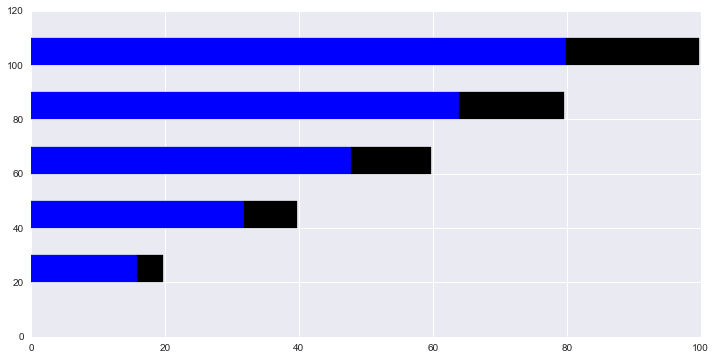

In [13]:
folds = 5
X_train,X_test,y_train,y_test = TS_crossval(x,y,folds)

Each fold size:  101
fold 1 ===> train:  0 _ 80  | test:  80 _ 100
Train Percentage: 80%
________________________________________________________________________________
fold 2 ===> train:  101 _ 181  | test:  181 _ 201
Train Percentage: 80%
________________________________________________________________________________
fold 3 ===> train:  202 _ 282  | test:  282 _ 302
Train Percentage: 80%
________________________________________________________________________________
fold 4 ===> train:  303 _ 383  | test:  383 _ 403
Train Percentage: 80%
________________________________________________________________________________
fold 5 ===> train:  404 _ 484  | test:  484 _ 504
Train Percentage: 80%
________________________________________________________________________________




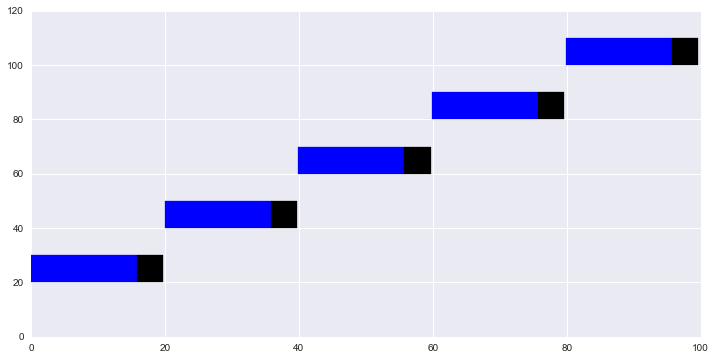

In [14]:
X_train,X_test,y_train,y_test = TS_crossval_block(x,y,folds)

#### Grid Search for Time Series

In [70]:
param_grid = {"max_features": [0.8,0.9,1], "max_depth":[3,5,7,12,None]}

In [71]:
rf = RandomForestRegressor(n_estimators=200,random_state=7)

In [72]:
grid_search = GridSearchCV(rf, param_grid=param_grid, 
                           cv=[(list(X_train[i].index),list(X_test[i].index)) for i in range(1,folds+1)])

In [73]:
grid_search.fit(x,y);

In [75]:
Grid_cv=pd.DataFrame(grid_search.cv_results_)
Grid_cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.285607,0.032050,0.017594,0.000495,3,0.8,"{'max_depth': 3, 'max_features': 0.8}",0.615696,0.636308,0.896278,0.194605,0.443036,0.557185,0.232018,10
1,0.293603,0.018516,0.018401,0.001023,3,0.9,"{'max_depth': 3, 'max_features': 0.9}",0.628820,0.618112,0.900832,0.194490,0.469924,0.562436,0.230635,9
2,0.254997,0.017838,0.018403,0.001019,3,1,"{'max_depth': 3, 'max_features': 1}",0.216464,0.155877,0.374979,-0.011712,0.165589,0.180239,0.124008,15
3,0.312798,0.032194,0.018405,0.001744,5,0.8,"{'max_depth': 5, 'max_features': 0.8}",0.608542,0.636430,0.900272,0.303213,0.418777,0.573447,0.204432,4
4,0.325597,0.049837,0.018403,0.000802,5,0.9,"{'max_depth': 5, 'max_features': 0.9}",0.623749,0.629895,0.901209,0.292835,0.395565,0.568651,0.211383,6
5,0.247799,0.008638,0.019001,0.001789,5,1,"{'max_depth': 5, 'max_features': 1}",0.226321,0.298902,0.536987,0.122644,0.289854,0.294942,0.136398,14
6,0.343006,0.049693,0.018394,0.000794,7,0.8,"{'max_depth': 7, 'max_features': 0.8}",0.605877,0.645998,0.899344,0.299346,0.379855,0.566084,0.212067,8
7,0.357415,0.051829,0.018789,0.001162,7,0.9,"{'max_depth': 7, 'max_features': 0.9}",0.616420,0.633769,0.897568,0.315120,0.407754,0.574126,0.202349,3
8,0.258397,0.017606,0.018599,0.000792,7,1,"{'max_depth': 7, 'max_features': 1}",0.249128,0.382445,0.603266,0.152483,0.328229,0.343110,0.151408,12
9,0.391203,0.082366,0.018996,0.001260,12,0.8,"{'max_depth': 12, 'max_features': 0.8}",0.607798,0.638381,0.893856,0.302734,0.389488,0.566451,0.207336,7


In [74]:
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'max_depth': 12, 'max_features': 0.9}


#### *What we learned*

* We learned how to do cross validation for time series and how to use it for grid search 